(plotting_with_matplotlib)=

# Plotting with Matplotlib

{doc}`Matplotlib <mpl:index>` is the default backend for ArviZ. Although most of the functions in the {ref}`plot <plot_api>` module work seamlessly with any backend, some advanced plots may require the use of backend specific features. In this guide, advanced plotting with Matplotlib will be covered.

This page can be downloaded as a {jupyter-download:script}`Python script <plotting_with_matplotlib>`
or as a {jupyter-download:nb}`Jupyter notebook <plotting_with_matplotlib>`.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

az.style.use("arviz-darkgrid")

## Customizing plots

(matplotlib_backend_kwargs)=
### Using `backend_kwargs`

The `backend_kwargs` argument can be very useful for some specific configuration. That is parameters available in {func}`matplotlib.pyplot.subplots`, which includes {meth}`~matplotlib.figure.Figure.add_subplot` and {class}`~mpl:matplotlib.gridspec.GridSpec` through `subplot_kw` and `gridspec_kw` respectively. As the options available depends on the backend, this parameter is not as flexible as creating custom axes.

As an example, the following code changes the `facecolor` from {func}`~matplotlib.pyplot.figure` and the `width_ratios` in the grid layout.

In [2]:
# load data
data = az.load_arviz_data('radon')

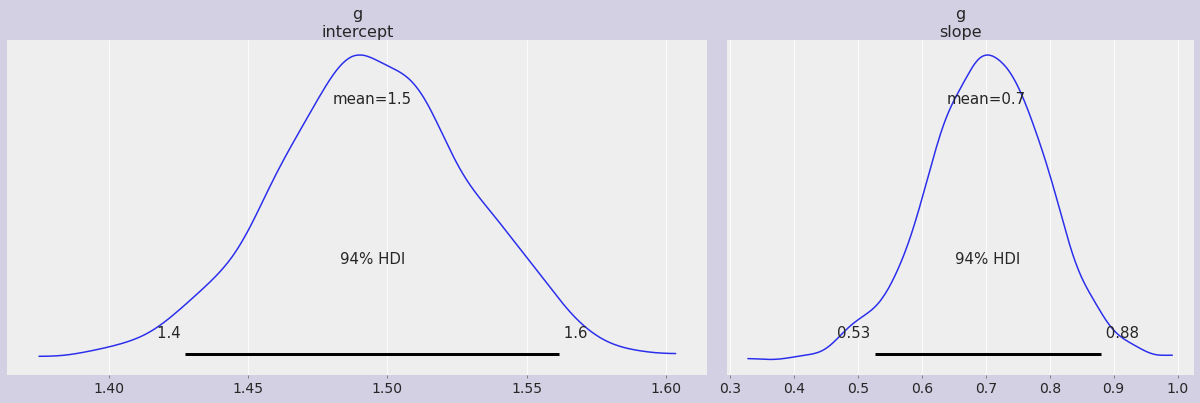

In [3]:
az.plot_posterior(
    data,
    var_names=["g"],
    backend_kwargs={
        "facecolor": "#d3d0e3",
        "gridspec_kw": {
            "width_ratios": [6,4]}});

:::{caution}
The parameters `ncol` and `nrows` from {func}`matplotlib.pyplot.subplots` should not be set using the `backend_kwargs` parameter. Instead, use the param {ref}`grid <common_grid>`
:::

(matplotlib_show)=
### The parameter `show`

The parameter `show` calls {func}`matplotlib.pyplot.show` if set to `True`. If `show` is not set, it will take the value from the rcParam `plot.matplotlib.show` which defaults to `False`.

:::{note} There are some Matplotlib backends like the inline (default) Jupyter backend that show the plot even if `plt.show` is not called. In such cases, plots will be shown automatically even if `show=False`.
:::

(matplotlib_ax)=
### Defining custom axes

The `ax` argument of any `plot` function allows to use created axes manually. In the example, this parameter allows to arrange 2 different plots in a grid, set limit to the x axis and share the axes between the two plots.

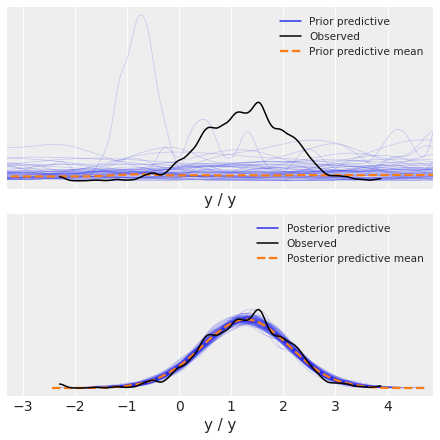

In [4]:
# load data
observed_data = data.observed_data.y.values
# create axes
_, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6, 6))
ax[0].set_xlim(xmin=observed_data.min() - 1, xmax=observed_data.max() + 1)
# plot
az.plot_ppc(data, group="prior", num_pp_samples=100, ax=ax[0])
az.plot_ppc(data, group="posterior", num_pp_samples=100, ax=ax[1]);

### Extending ArviZ-Matplotlib plots

As an Arviz plot returns an {class}`~matplotlib.axes.Axes` object, different Matplotlib plots can be added to a plot generated with Arviz:

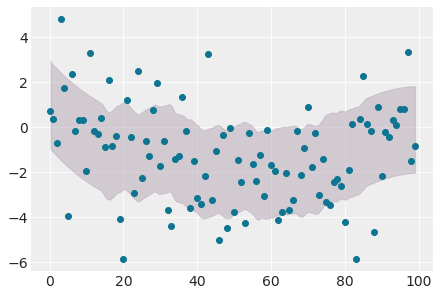

In [5]:
# load data
data = az.load_arviz_data('regression1d')
X = data.observed_data.y_dim_0
Y = data.observed_data.y
y_pp = data.posterior_predictive.y
# plot
ax = az.plot_hdi(X, y_pp, color="#b5a7b6")
ax.scatter(X, Y, c="#0d7591");

Similarly, custom axes allow to display Arviz and Matplotlib plots in the same grid. In this example, the plot in `ax1` has an Arviz plot modified with a Matplotlib plot and the `ax2` has a `scatter` created using Matplotlib.

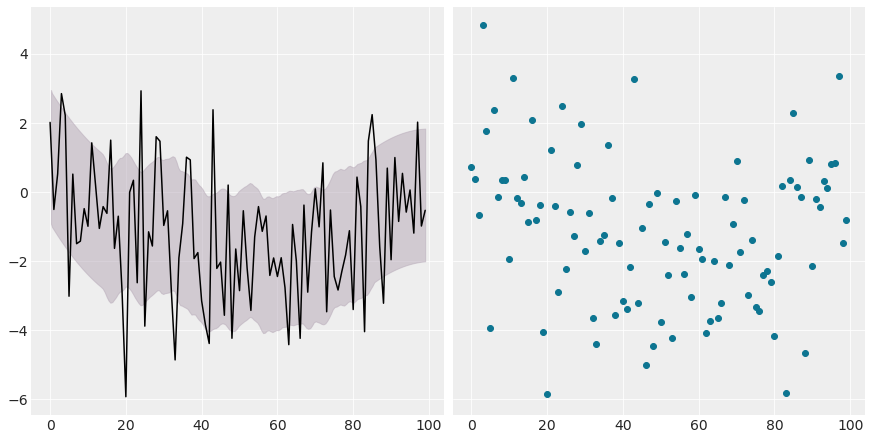

In [6]:
# create axes
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# plot ax1
az.plot_hdi(X, y_pp, color="#b5a7b6", ax=ax1)
ax1.plot(X, y_pp.mean(axis=(0, 1)), c="black")
# plot ax2
ax2.scatter(X, Y, c="#0d7591");